# 训练用于图片识别的人工神经网络

## 用人工神经网络建模复杂函数

### 单层神经网络概括

Adaline的相关内容

### 介绍多层神经网络架构

![MLP](MLP.png)

### 通过前向传播激活神经网络

## 对手写数字进行分类

### 获取MNIST数据集

In [1]:
import os
import struct
import numpy as np


def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '{}-labels-idx1-ubyte'.format(kind))
    images_path = os.path.join(path, '{}-images-idx3-ubyte'.format(kind))

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)

    return images, labels


In [4]:
X_train, y_train = load_mnist('mnist')
print('Row: {}, columns: {}'.format(X_train.shape[0], X_train.shape[1]))


Row: 60000, columns: 784


In [5]:
X_test, y_test = load_mnist('mnist', kind='t10k')
print('Row: {}, columns: {}'.format(X_test.shape[0], X_test.shape[1]))


Row: 10000, columns: 784


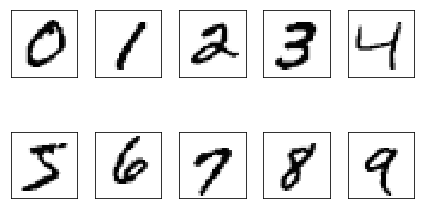

In [7]:
# visualize the digits
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


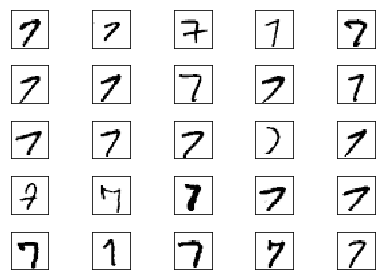

In [8]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


### 实现多层感知器

In [9]:
from neuralnet import NeuralNetMLP
nn = NeuralNetMLP(n_output=10,
                  n_features=X_train.shape[1],
                  n_hidden=50,
                  l2=0.1, l1=0.0,
                  epochs=1000,
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  shuffle=True,
                  minibatches=50,
                  random_state=1)


In [10]:
nn.fit(X_train, y_train, print_progress=True)


Epoch: 1000/1000

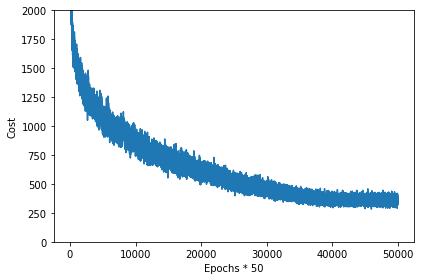

In [11]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
plt.show()
